# Predictive Modelling - Neural Networks

In this workshop you will be building your first Neural Network! Because this workshops is intened to be a walkthrough, please make sure to follow and answer each of the questions in order.

In [1]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

### Exercise 1: Data Generation

- Create **2** arrays of **2000** equally spaced points between **-10** and **10**. Assign one to the variable **X** and the other to variable **y**
- Create **2** arrays of **2000** random points *(uniformly distributed)* between **-1.8** and **1.8** and add one to **X** and one to **y** (this will add noise to your data points)
- Plot your points

<AxesSubplot:>

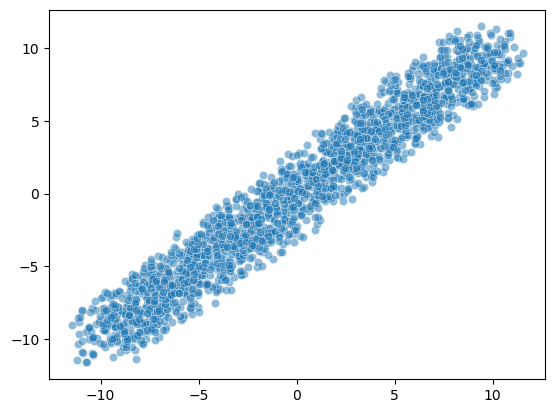

In [2]:
# Ex.1 
X = np.linspace(-10, 10, 2000) + np.random.uniform(-1.8, 1.8, 2000)
y = np.linspace(-10, 10, 2000) + np.random.uniform(-1.8, 1.8, 2000)

sns.scatterplot(x=X, y=y, alpha=0.5)

### Exercise 2: Your Model

Compile a simple neural network comprising of **1** *hidden layer* with **3** neurons. Don't forget your activation function!

**Note:** This is a regression problem:
- The output layer does not require an activation function
- You will need a **regression** [loss function](https://keras.io/api/losses/) & [metrics](https://keras.io/api/metrics/)

In [3]:
# use if rerunning the model to make sure the weights are not carried over for each run
tf.keras.backend.clear_session()

In [4]:
# Ex. 2

# set the model
model = keras.Sequential([
        keras.layers.Dense(3, activation="linear", input_shape=[1]),
        keras.layers.Dense(1)
    ])
model.summary()

# using mse and rmse as the loss and metric since these are good for linear regression
model.compile(loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


### Exercise 3: Train, Validation & Holdout sets

- Isolate a small portion of your data to test your model's performance after training *(Train-Test-Split)*
- Fit your model. Choose the appropriate values for your **epochs** and **batch sizes**. Set your **validation_split** to *20%*

In [5]:
# get the split used for each model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

In [6]:
# Ex. 3

# choosing 50 epochs with 200 batch size after experimenting with a few options, this seems most consistent
history_1 = model.fit(X_train, y_train, epochs=50, batch_size=200,  verbose=0, validation_split=0.2)

### Exercise 4: Model Evaluation 

- Evaluate your model
- Plot your **y_true** and your **predictions**

7/7 - 0s - loss: 2.0550 - root_mean_squared_error: 1.4335 - 47ms/epoch - 7ms/step


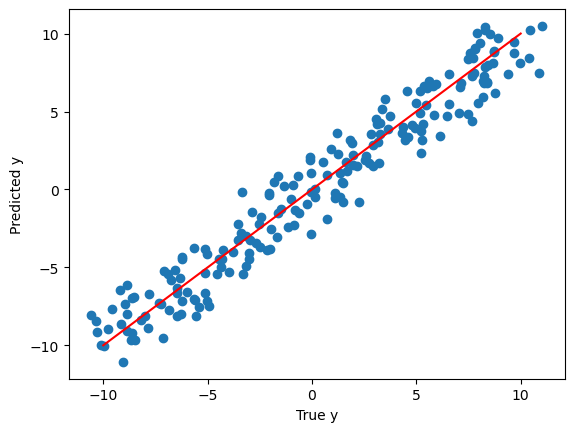

In [7]:
# Ex. 4

# get predictions
y_pred = model.predict(X_test, verbose=0)

# show metrics
model.evaluate(X_test, y_test, verbose=2)

# plot with the test set that was not used in the model and add a red line showing expected alignment
plt.scatter(y_test, y_pred)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.plot([-10,10], [-10,10], color='red')
plt.show()

# this model looks pretty good as most points are not too far from the line and mse and rmse are low
# running the model multiple different times, sometimes the predictions are very off, but usually they look like this

### Exercise 5.1: Fine Tuning

The number of neurons within the *hidden layer*, as well as the *number* of hidden layers used, significantly impact a model's results.
- Change the number of neurons in the *hidden layer* to **10**
- Train and evaluate your model. Compare your results 

In [8]:
# Ex. 5.1

# adding neurons to the single hidden layer
model_2 = keras.Sequential([
        keras.layers.Dense(10, activation="linear", input_shape=[1]),
        keras.layers.Dense(1)
    ])
model_2.summary()

model_2.compile(loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                20        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [9]:
# same settings as first model
history_2 = model_2.fit(X_train, y_train, epochs=50, batch_size=200,  verbose=0, validation_split=0.2)

Current model
7/7 - 0s - loss: 2.0829 - root_mean_squared_error: 1.4432 - 35ms/epoch - 5ms/step
Previous model
7/7 - 0s - loss: 2.0550 - root_mean_squared_error: 1.4335 - 36ms/epoch - 5ms/step


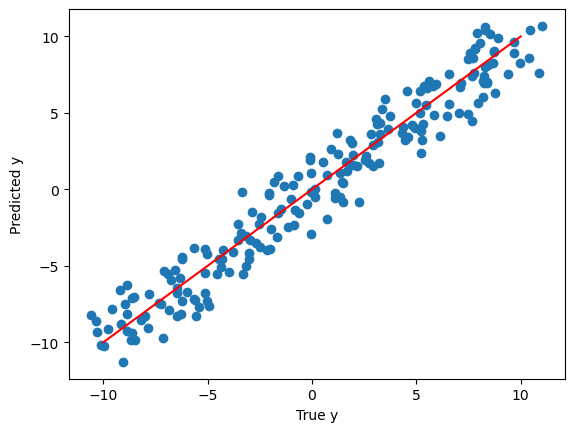

In [10]:
# get predictions
y_pred_2 = model_2.predict(X_test, verbose=0)

# show metrics
print('Current model')
model_2.evaluate(X_test, y_test, verbose=2)
print('Previous model')
model.evaluate(X_test, y_test, verbose=2)

# plot with the test set that was not used in the model and add a red line showing expected alignment
plt.scatter(y_test, y_pred_2)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.plot([-10,10], [-10,10], color='red')
plt.show()

# the plot and metrics are almost the same, though this model doesn't ever seem to go askew

### Exercise 5.2: Fine Tuning P2

Do the same as in `5.1`, except:
- Reset the number of neurons in the *hidden layer* to **3**
- Add a second *hidden layer* with **3** neurons
- Initialize the model's weights with the use of [*initializers*](https://keras.io/api/layers/initializers/)
- Train and evaluate your model. Compare your results from all previous models

In [11]:
# Ex. 5.2

# adding neurons to the single hidden layer
model_3 = keras.Sequential([
        keras.layers.Dense(3, activation="linear", input_shape=[1], kernel_initializer='ones'),
        keras.layers.Dense(3, activation="linear"),
        keras.layers.Dense(1)
    ])
model_3.summary()

model_3.compile(loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 6         
                                                                 
 dense_5 (Dense)             (None, 3)                 12        
                                                                 
 dense_6 (Dense)             (None, 1)                 4         
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [12]:
# same settings as first model
history_3 = model_3.fit(X_train, y_train, epochs=50, batch_size=200,  verbose=0, validation_split=0.2)

Current model
7/7 - 0s - loss: 2.0530 - root_mean_squared_error: 1.4328 - 33ms/epoch - 5ms/step
First model
7/7 - 0s - loss: 2.0550 - root_mean_squared_error: 1.4335 - 35ms/epoch - 5ms/step
Second model
7/7 - 0s - loss: 2.0829 - root_mean_squared_error: 1.4432 - 33ms/epoch - 5ms/step


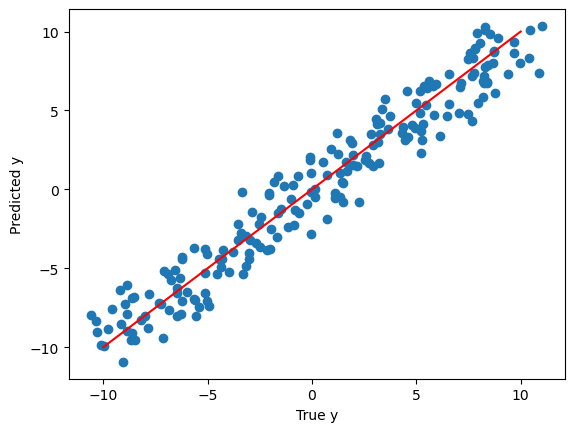

In [13]:
# get predictions
y_pred_3 = model_3.predict(X_test, verbose=0)

# show metrics
print('Current model')
model_3.evaluate(X_test, y_test, verbose=2)
print('First model')
model.evaluate(X_test, y_test, verbose=2)
print('Second model')
model_2.evaluate(X_test, y_test, verbose=2)

# plot with the test set that was not used in the model and add a red line showing expected alignment
plt.scatter(y_test, y_pred_3)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.plot([-10,10], [-10,10], color='red')
plt.show()

# again the models are almost exactly the same in terms of loss and rmse

### Exercise 6: Automate!

Use a function to *automate* questions 1 through 5. The function should have 3 parameters: 
- Activation function 
- Number of hidden layers
- Number of neurons for each of the hidden layers

Try passing different arguments to function to try to get the best result that you can (at least 3 different results)

In [17]:
# Ex. 6

def test_model(activation, layers, neurons):
    # create model
    mod = keras.Sequential()
    mod.add(keras.Input(shape=[1]))
    for i in range(layers):
        mod.add(keras.layers.Dense(neurons, activation=activation))
    mod.add(keras.layers.Dense(1))
    
    # compile and fit
    mod.compile(loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    hist = mod.fit(X_train, y_train, epochs=50, batch_size=200,  verbose=0, validation_split=0.2)
    
    # get and display metrics
    info = mod.evaluate(X_test, y_test, verbose=0)
#     print(f"Model -> Activation: {activation}, Layers: {layers}, Neurons: {neurons}")
    print(f"Loss: {info[0]:.4f}\t RMSE: {info[1]:.4f}\t Activation: {activation}\t Layers: {layers}\t Neurons: {neurons}")
    

In [18]:
test_model('relu', 3, 10)
test_model('relu', 10, 100)
test_model('sigmoid', 3, 10)
test_model('sigmoid', 10, 100)
test_model('tanh', 3, 10)
test_model('tanh', 10, 100)
test_model('linear', 3, 10)
test_model('linear', 10, 100)

# the result below indicate that the activation is much more important that the layers and neurons
# relu and linear are the best activators for these tests
# adding many layers and neurons usually has a detrimental effect because of overfitting
# The best results here are relu with 3 layers and 10 neurons which is about the same as the tests above

Loss: 2.0863	 RMSE: 1.4444	 Activation: relu	 Layers: 3	 Neurons: 10
Loss: 2.2426	 RMSE: 1.4975	 Activation: relu	 Layers: 10	 Neurons: 100
Loss: 21.3635	 RMSE: 4.6221	 Activation: sigmoid	 Layers: 3	 Neurons: 10
Loss: 35.2473	 RMSE: 5.9369	 Activation: sigmoid	 Layers: 10	 Neurons: 100
Loss: 2.4363	 RMSE: 1.5609	 Activation: tanh	 Layers: 3	 Neurons: 10
Loss: 2.5331	 RMSE: 1.5916	 Activation: tanh	 Layers: 10	 Neurons: 100
Loss: 2.5631	 RMSE: 1.6010	 Activation: linear	 Layers: 3	 Neurons: 10
Loss: 3.0676	 RMSE: 1.7514	 Activation: linear	 Layers: 10	 Neurons: 100


In [20]:
# test a range of layers and neurons
for i in range(2,5):
    for j in range(8,13):
        test_model('relu', i, j)
        
# in this case 3 layers with 10 neurons wins but they are all close
# 4 layers with 8 neurons probably had a bad random starting point on the gradient descent

Loss: 2.1267	 RMSE: 1.4583	 Activation: relu	 Layers: 2	 Neurons: 8
Loss: 2.1081	 RMSE: 1.4519	 Activation: relu	 Layers: 2	 Neurons: 9
Loss: 2.0865	 RMSE: 1.4445	 Activation: relu	 Layers: 2	 Neurons: 10
Loss: 2.1245	 RMSE: 1.4576	 Activation: relu	 Layers: 2	 Neurons: 11
Loss: 2.1473	 RMSE: 1.4654	 Activation: relu	 Layers: 2	 Neurons: 12
Loss: 2.0817	 RMSE: 1.4428	 Activation: relu	 Layers: 3	 Neurons: 8
Loss: 2.0502	 RMSE: 1.4318	 Activation: relu	 Layers: 3	 Neurons: 9
Loss: 2.0836	 RMSE: 1.4435	 Activation: relu	 Layers: 3	 Neurons: 10
Loss: 2.0710	 RMSE: 1.4391	 Activation: relu	 Layers: 3	 Neurons: 11
Loss: 2.1449	 RMSE: 1.4645	 Activation: relu	 Layers: 3	 Neurons: 12
Loss: 12.7909	 RMSE: 3.5764	 Activation: relu	 Layers: 4	 Neurons: 8
Loss: 2.0553	 RMSE: 1.4336	 Activation: relu	 Layers: 4	 Neurons: 9
Loss: 2.0795	 RMSE: 1.4420	 Activation: relu	 Layers: 4	 Neurons: 10
Loss: 2.0538	 RMSE: 1.4331	 Activation: relu	 Layers: 4	 Neurons: 11
Loss: 2.0519	 RMSE: 1.4324	 Activation: